In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Train.csv')
train.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [3]:
train.shape

(5429, 9)

In [4]:
train.isnull().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
date                0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
dtype: int64

In [5]:
train.duplicated().sum()

0

In [6]:
test = pd.read_csv('Test.csv')
test.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0


In [7]:
test.shape

(2327, 8)

In [8]:
test.isnull().sum()

session_id         0
session_number     0
client_agent      59
device_details     0
date               0
purchased          0
added_in_cart      0
checked_out        0
dtype: int64

In [9]:
train['client_agent'].value_counts()

Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like Mac OS X) AppleWebKit/537.51.2 (KHTML, like Gecko) Mobile/11D201                                                                                                                                                     209
Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; Touch; rv:11.0) like Gecko                                                                                                                                                                                        163
Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko                                                                                                                                                                                               148
Product/4.2.0 iPhone/7.1.1                                                                                                                                                                                         

In [10]:
train['device_details'].value_counts()

iPhone - iOS                  1515
Desktop - Chrome               815
iPhone - Web                   665
Android Phone - Android        326
Desktop - Safari               313
Desktop - IE                   292
iPad - Web                     289
iPhone - MobileWeb             277
Desktop - Firefox              234
Android Tablet - Web           203
Other - Other                  185
Unknown - MobileWeb             87
Android Phone - Web             86
iPad - iOS                      77
Android Phone - MobileWeb       54
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Name: device_details, dtype: int64

In [11]:
train['device'] = train['device_details'].apply(lambda x:x.split('-')[0])
test['device'] = test['device_details'].apply(lambda x:x.split('-')[0])

In [12]:
train['browser'] = train['device_details'].apply(lambda x:x.split('-')[1])
test['browser'] = test['device_details'].apply(lambda x:x.split('-')[1])

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 11 columns):
session_id        5429 non-null object
session_number    5429 non-null int64
client_agent      5269 non-null object
device_details    5429 non-null object
date              5429 non-null object
purchased         5429 non-null int64
added_in_cart     5429 non-null int64
checked_out       5429 non-null int64
time_spent        5429 non-null float64
device            5429 non-null object
browser           5429 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 466.6+ KB


In [14]:
train['year'] = train['date'].apply(lambda x:x.split('-')[0])
test['year'] = test['date'].apply(lambda x:x.split('-')[0])

In [15]:
train['month'] = train['date'].apply(lambda x:x.split('-')[1])
test['month'] = test['date'].apply(lambda x:x.split('-')[1])

In [16]:
train['day'] = train['date'].apply(lambda x:x.split('-')[2])
test['day'] = test['date'].apply(lambda x:x.split('-')[2])

In [17]:
train['year'] = train['year'].astype(int)
train['month'] = train['month'].astype(int)
train['day'] = train['day'].astype(int)
test['year'] = test['year'].astype(int)
test['month'] = test['month'].astype(int)
test['day'] = test['day'].astype(int)

In [18]:
train = train.drop(['session_id', 'client_agent', 'device_details', 'date'], axis = 1)
newtest = test
newtest = newtest.drop(['session_id', 'client_agent', 'device_details', 'date'], axis = 1)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
train['device'] = le.fit_transform(train['device'])
newtest['device'] = le.fit_transform(newtest['device'])
train['browser'] = le.fit_transform(train['browser'])
newtest['browser'] = le.fit_transform(newtest['browser'])

In [21]:
x = train.drop('time_spent', axis = 1)
y = train['time_spent']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [23]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1370.2563109268904


In [26]:
x_train = train.drop('time_spent', axis = 1)
y_train = train['time_spent']
x_test = newtest

In [27]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'time_spent':np.abs(y_pred)})
solution.to_csv('Solution1.csv', index = False)

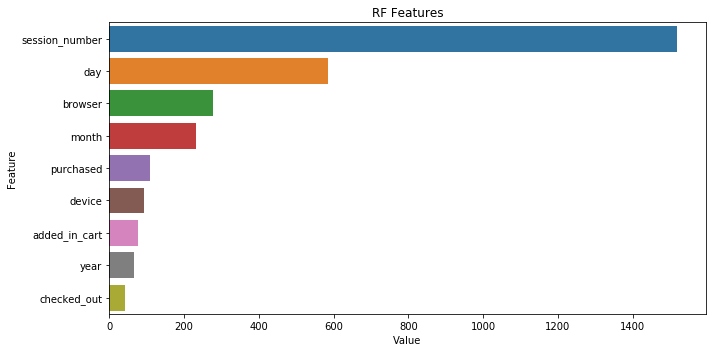

In [28]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RF Features')
plt.tight_layout()
plt.show()

In [29]:
x_train = train.drop(['time_spent', 'checked_out', 'year'], axis = 1)
y_train = train['time_spent']
x_test = newtest.drop(['checked_out', 'year'], axis = 1)
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'time_spent':np.abs(y_pred)})
solution.to_csv('Solution3.csv', index = False)

In [34]:
x_train = train.drop('time_spent', axis = 1)
y_train = train['time_spent']
x_test = newtest
from xgboost import XGBRegressor
lgbm = XGBRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'time_spent':np.abs(y_pred)})
solution.to_csv('Solution2.csv', index = False)

C:\Users\Akshay\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Akshay\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:28:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [82]:
x_train = train.drop(['time_spent', 'checked_out', 'year'], axis = 1)
y_train = train['time_spent']
x_test = newtest.drop(['checked_out', 'year'], axis = 1)
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'time_spent':np.abs(y_pred)})
solution.to_csv('Solution1.csv', index = False)